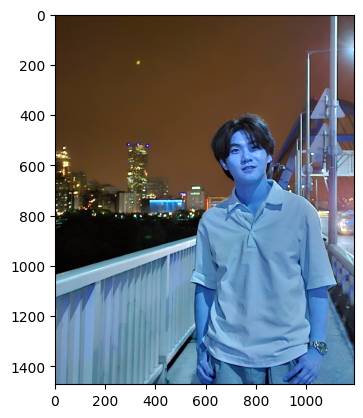

In [7]:

import os 
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt 
import numpy as np 
import dlib 

my_image_path = r'C:\Users\hjin0\Desktop\aiffel\camera_sticker\image\1.png' 
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show() 

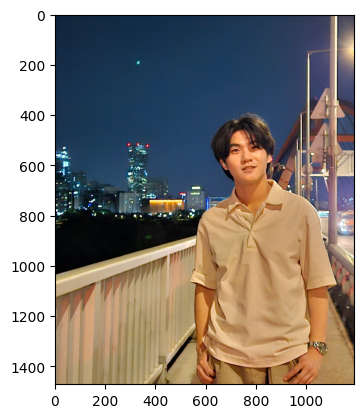

![02.png](attachment:02.png)

![002.png](attachment:02.png)

In [8]:
from IPython.display import Markdown, display

# cv2.imread()로 읽어온 이미지는 BGR형식으로 읽어온다.
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌 (원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라고 합니다.)
plt.show()
display(Markdown("![02.png](attachment:02.png)"))
#2번째 이미지
display(Markdown("![002.png](attachment:02.png)"))


In [9]:
# dlib 라이브러리의 get_frontal_face_detector() 함수를 사용하여 얼굴을 감지하는 detector를 선언합니다.
# dlib.get_frontal_face_detector()는 기본 얼굴 감지기를 반환합니다.
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

from IPython.display import Markdown, display

# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   

# dlib.rectangle 객체의 좌표를 확인합니다
print(dlib_rects[0]) # dlib.rectangle 객체의 좌표를 확인합니다
if len(dlib_rects) == 0:
    print("얼굴을 찾을 수 없습니다.")
else:
    for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
        l = dlib_rect.left() # 왼쪽
        t = dlib_rect.top() # 위쪽
        r = dlib_rect.right() # 오른쪽
        b = dlib_rect.bottom() # 아래쪽

        cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림
# cv2.rectangle(이미지, 시작점 좌표, 종료점 좌표, 색상, 두께, 선 종류)
# cv2.rectangle()는 OpenCV의 사각형을 그리는 함수
# img_show: 이미지 위에 그려질 사각형 # (l,t): 시작점 좌표 # (r,b): 종료점 좌표 # (0,255,0): 색상 (BGR형식으로 지정) # 2: 두께# lineType=cv2.LINE_AA: 선 종류 (anti-aliased line)
# cv2.LINE_AA: 부드러운 선을 그리는 방법 # cv2.rectangle()는 이미지 위에 사각형을 그리는 함수

rectangles[[(683, 494) (838, 649)]]
[(683, 494) (838, 649)]


#rectangles[[(683, 494) (838, 649)]]
#못찾는거 같다
![003.png](./003.png)
![004.png](./004.png)

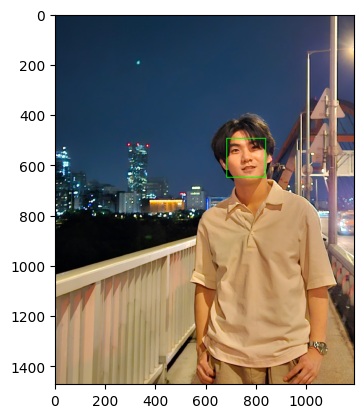

![03.png](attachment:03.png)

![04.png](attachment:04.png)

In [ ]:
from IPython.display import Markdown, display

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

![03.png](./03.png)
#박스가 없다다
![04.png](./04.png)

# shape_predictor_68_face_landmarks.data다운받고 models에 저장

68


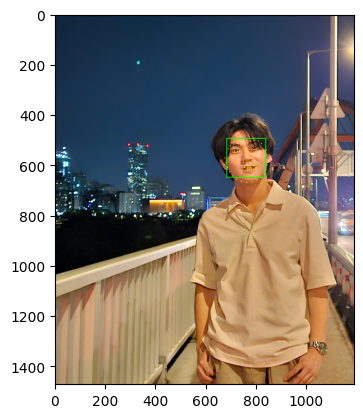

" display(Image(filename='04.png')) "

In [ ]:
model_path = r'C:\Users\hjin0\Desktop\aiffel\camera_sticker\models\shape_predictor_68_face_landmarks.dat'
    # 저장한 landmark 모델의 주소를 model_path 변수에 저장
landmark_predictor = dlib.shape_predictor(model_path)
    # dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
    # landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
    # dlib.rectangle: 내부를 예측하는 박스
    # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄



list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성    
# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장
print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list 
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)
from IPython.display import Markdown, display

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()


In [ ]:
![04png](./04.png)

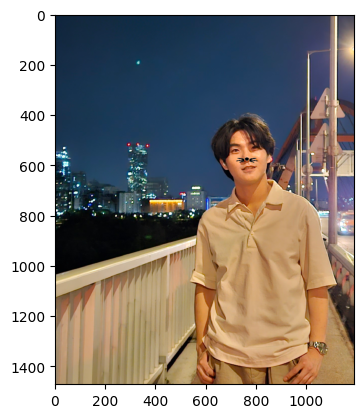

In [12]:
sticker_path = 'C:/Users/hjin0/Desktop/aiffel/camera_sticker/image/cat.png'
img_sticker = cv2.imread(sticker_path)

# 랜드마크 추출
landmarks = list_landmarks[0]

# 수염 위치 계산
nose_bottom = landmarks[33]
mouth_top = landmarks[51]
mustache_x = (nose_bottom[0] + mouth_top[0]) // 2 - 5
mustache_y = (nose_bottom[1] + mouth_top[1]) // 2 - 25

# 수염 크기 조정
mouth_width = landmarks[54][0] - landmarks[48][0]
scale_factor = mouth_width / img_sticker.shape[1] * 1.5
img_sticker_resized = cv2.resize(img_sticker, None, fx=scale_factor, fy=scale_factor)

# 수염 위치 설정
refined_x = mustache_x - img_sticker_resized.shape[1] // 2
refined_y = mustache_y - int(img_sticker_resized.shape[0] * 0.4)

# 마스크 처리
hsv_sticker = cv2.cvtColor(img_sticker_resized, cv2.COLOR_BGR2HSV)
lower_white = np.array([0, 0, 200])
upper_white = np.array([180, 30, 255])
white_mask = cv2.inRange(hsv_sticker, lower_white, upper_white)
mask = 255 - white_mask
kernel = np.ones((3,3), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask_3channel = cv2.merge([mask, mask, mask])

# 합성 (랜드마크 없는 원본 이미지에서 영역 추출)
sticker_area = img_bgr[refined_y:refined_y + img_sticker_resized.shape[0], 
                       refined_x:refined_x + img_sticker_resized.shape[1]]
    
img_bgr[refined_y:refined_y + img_sticker_resized.shape[0], 
        refined_x:refined_x + img_sticker_resized.shape[1]] = \
    np.where(mask_3channel > 0, img_sticker_resized, sticker_area).astype(np.uint8)

# 결과 출력
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()


#cv2.addweighted를 사용했을떄
![12.png](./12.png)
#별로여서 제거
#그냥 했을떄
![13.png](./13.png)
#얼굴에 완전히 맞게 회전하는 일반화를 하려 했지만 실패
![14.png](./14.png)
![11.png](./11.png)

In [ ]:
''' # 흰색 배경을 마스크로 변환 (HSV 색공간 사용)
hsv_sticker = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2HSV)
lower_white = np.array([0, 0, 200])  # HSV에서 흰색의 하한값
upper_white = np.array([180, 30, 255])  # HSV에서 흰색의 상한값
white_mask = cv2.inRange(hsv_sticker, lower_white, upper_white)
mask = 255 - white_mask  # 마스크 반전 (흰색을 0으로)

# 마스크를 3채널로 확장 (BGR 이미지와 크기 맞추기)
mask_3channel = cv2.merge([mask, mask, mask])

# sticker_area는 원본이미지에서 스티커를 적용할 위치를 crop한 이미지
sticker_area = img_show[int(refined_y):int(refined_y)+img_sticker.shape[0], 
                       int(refined_x):int(refined_x)+img_sticker.shape[1]]

# 여기가 핵심! 생성한 마스크를 사용하여 합성
img_show[int(refined_y):int(refined_y)+img_sticker.shape[0], 
        int(refined_x):int(refined_x)+img_sticker.shape[1]] = \
    np.where(mask_3channel > 0, img_sticker, sticker_area).astype(np.uint8)

# 결과 확인
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()
# ![09.png]
 '''

In [ ]:
''' # 스티커 이미지와 원본 이미지 합성
sticker_area = cv2.addWeighted(sticker_area, 0.7, img_sticker, 0.3, 0)
# 수염 이미지
sticker_area = img_bgr[int(refined_y):int(refined_y) + img_sticker.shape[0], int(refined_x):int(refined_x) + img_sticker.shape[1]]
# img_bgr은 7-2에서 rgb로만 적용해놓은 원본 이미지이다. 
img_show[int(refined_y):int(refined_y)+img_sticker.shape[0], 
        int(refined_x):int(refined_x)+img_sticker.shape[1]] = \
    np.where(mask_3channel > 0, img_sticker, sticker_area).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()
#![10.png]
# 원하는 시작점에 왔지만 수염의 좌우위치가 얼굴과 맞지 않아 다시 위에서 부터 수정을 한다.
#![11.png] '''